In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('ggplot')

In [3]:
df = pd.read_csv('responses.csv')

In [4]:
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [5]:
df.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,15.000000,62.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,19.000000,167.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000,20.000000,173.000000,64.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,22.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,30.000000,203.000000,165.000000,10.000000


In [6]:
likemusic = df['Music']

(array([  9.,   0.,  11.,   0.,   0.,  36.,   0., 129.,   0., 822.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

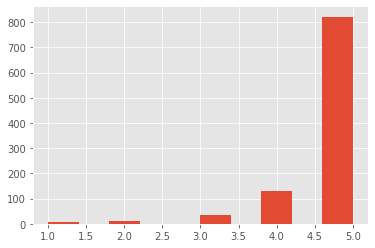

In [7]:
plt.hist(likemusic)

In [8]:
def create_features(x):
    x_music = x.loc['Dance':'Opera']
    dict_x = x_music.to_dict()
    x['music_genre']  =  sorted(dict_x,key=dict_x.__getitem__,reverse=True)[0]
    

    x_movie = x.loc["Horror":"Action"]
    dict_x = x_movie.to_dict()
    x['movie_genre']  =  sorted(dict_x,key=dict_x.__getitem__,reverse=True)[0]

    x_hobby = x.loc["History":"Pets"]
    dict_x = x_hobby.to_dict()
    x['hobbies_interests']  =  sorted(dict_x,key=dict_x.__getitem__,reverse=True)[0]  

    x_phopia = x.loc["Flying":"Fear of public speaking"]
    dict_x = x_phopia.to_dict()
    x['phobia']  =  sorted(dict_x,key=dict_x.__getitem__,reverse=True)[0]

    return x


In [9]:
df = df.apply(create_features,axis=1)
print('finished')

finished


adding the BMI(body masse index as a feature) 

In [26]:
df['BMI'] = df['Weight']/((df['Height']/100)**2)
df['BMI'].describe()

count    980.000000
mean      21.973756
std        4.944394
min       15.495868
25%       19.591837
50%       21.453430
75%       23.723534
max      143.080125
Name: BMI, dtype: float64

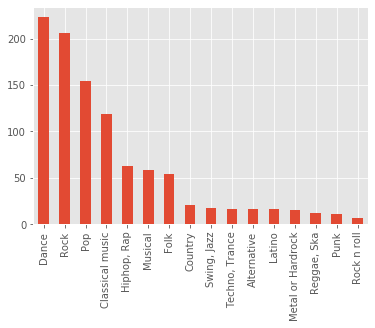

In [12]:
df['music_genre'].value_counts().plot(kind='bar')

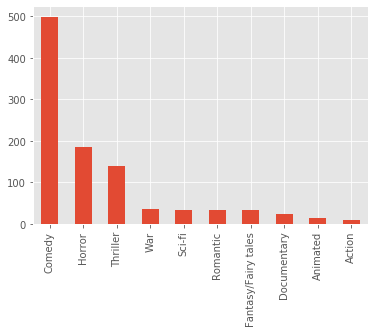

In [13]:
df['movie_genre'].value_counts().plot(kind='bar')

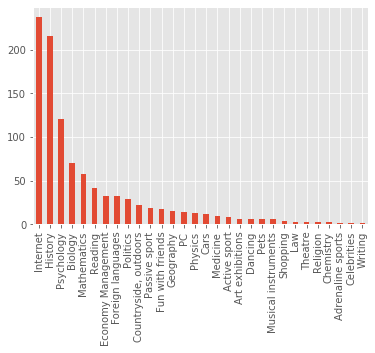

In [14]:
df['hobbies_interests'].value_counts().plot(kind='bar')

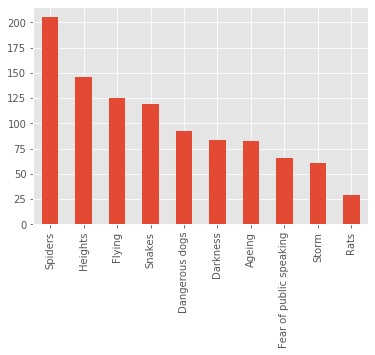

In [15]:
df['phobia'].value_counts().plot(kind='bar')

#### comparing women and men phobias 

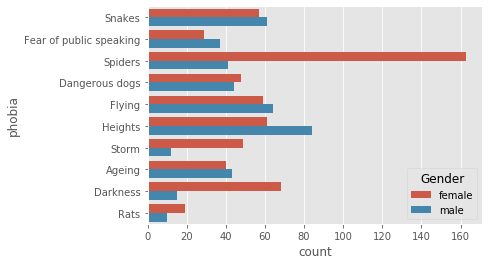

In [16]:
sns.countplot(y='phobia',hue='Gender',data=df)

count    980.000000
mean      21.973756
std        4.944394
min       15.495868
25%       19.591837
50%       21.453430
75%       23.723534
max      143.080125
Name: BMI, dtype: float64


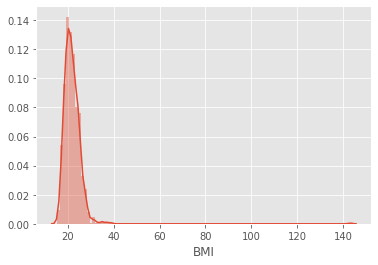

In [35]:
print(df['BMI'].describe())
sns.distplot(df['BMI'],bins=100)